# Tugas Hands On - 1
## Ericson Chandra 
## 121450026


# Soal 1
Rekamlah suara Anda sendiri selama 20 detik dimana anda membaca sebuah teks berita.
Dalam 20 detik rekaman tersebut, anda harus merekam:
5 detik pertama: membaca dengan suara sangat pelan dan berbisik
5 detik kedua: membaca dengan suara normal
5 detik ketiga: membaca dengan suara keras
5 detik terakhir: membaca dengan suara cempreng (dibuat-buat cempreng)
5 detik terakhir: membaca dengan suara berteriak
Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
Visualisasikan waveform dan spektogram dari rekaman suara anda
Sertakan penjelasan singkat mengenai hasil visualisasi tersebut.

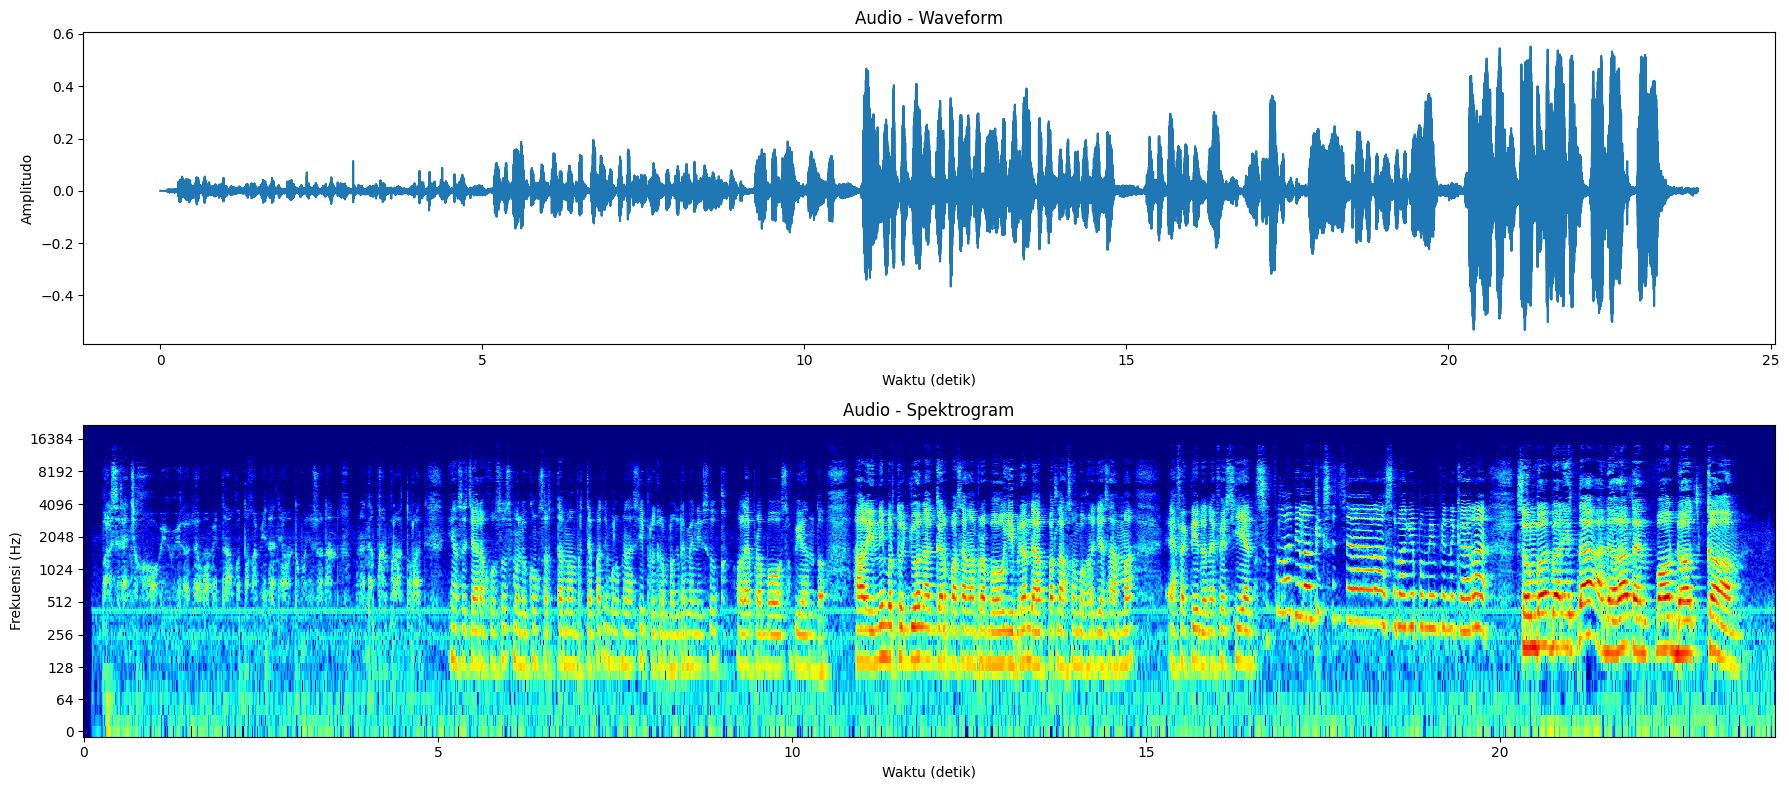

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import wave
import os

file_path = r"E:\2025 project\multimedia\soal1.wav.wav"  

# Fungsi untuk memuat dan memproses audio
def proses_audio(file_path):
    # Memuat audio menggunakan librosa
    data_audio, sr = librosa.load(file_path, sr=None)
    # Membuat sumbu waktu
    sumbu_waktu = np.linspace(0, len(data_audio) / sr, len(data_audio))
    
    return data_audio, sr, sumbu_waktu

# Fungsi untuk visualisasi waveform dan spektrogram
def visualisasi_audio(data_audio, sr, sumbu_waktu, title='Audio'):
    # Membuat figure dengan dua sub-plot (waveform dan spektrogram)
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    # Plot waveform
    ax[0].plot(sumbu_waktu, data_audio)
    ax[0].set_title(f'{title} - Waveform')
    ax[0].set_xlabel('Waktu (detik)')
    ax[0].set_ylabel('Amplitudo')
    
    # Plot spektrogram
    S = librosa.stft(data_audio)
    S_db = librosa.amplitude_to_db(np.abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet', ax=ax[1])
    ax[1].set_title(f'{title} - Spektrogram')
    ax[1].set_xlabel('Waktu (detik)')
    ax[1].set_ylabel('Frekuensi (Hz)')
    
    plt.tight_layout()
    plt.show()

# Memuat audio menggunakan fungsi proses_audio
data_audio, sr, sumbu_waktu = proses_audio(file_path)

# Visualisasi audio
visualisasi_audio(data_audio, sr, sumbu_waktu, 'Audio')


### file : 
https://drive.google.com/file/d/1rxAjr1uizjqslPIMRmZcTubo7HwwpmI4/view?usp=drive_link 

### Waveform: 
Menunjukkan amplitudo (volume) suara seiring waktu. Bagian dengan gelombang besar menandakan suara keras, sedangkan gelombang kecil menandakan suara lembut. Ini membantu kita melihat perubahan intensitas suara.

### Spectrogram: 
Menampilkan frekuensi (tinggi atau rendah) suara sepanjang waktu. Warna yang lebih terang menunjukkan frekuensi yang lebih kuat. Ini memberikan gambaran lebih mendalam tentang komponen frekuensi dalam suara selama durasi rekaman.

# Soal 2
Cari musik dengan durasi kurang dari 30 detik tanpa efek fading di awal dan akhirnya.
Terapkan teknik fading pada bagian awal dan akhir musik tersebut.

c:\Users\a c e r\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


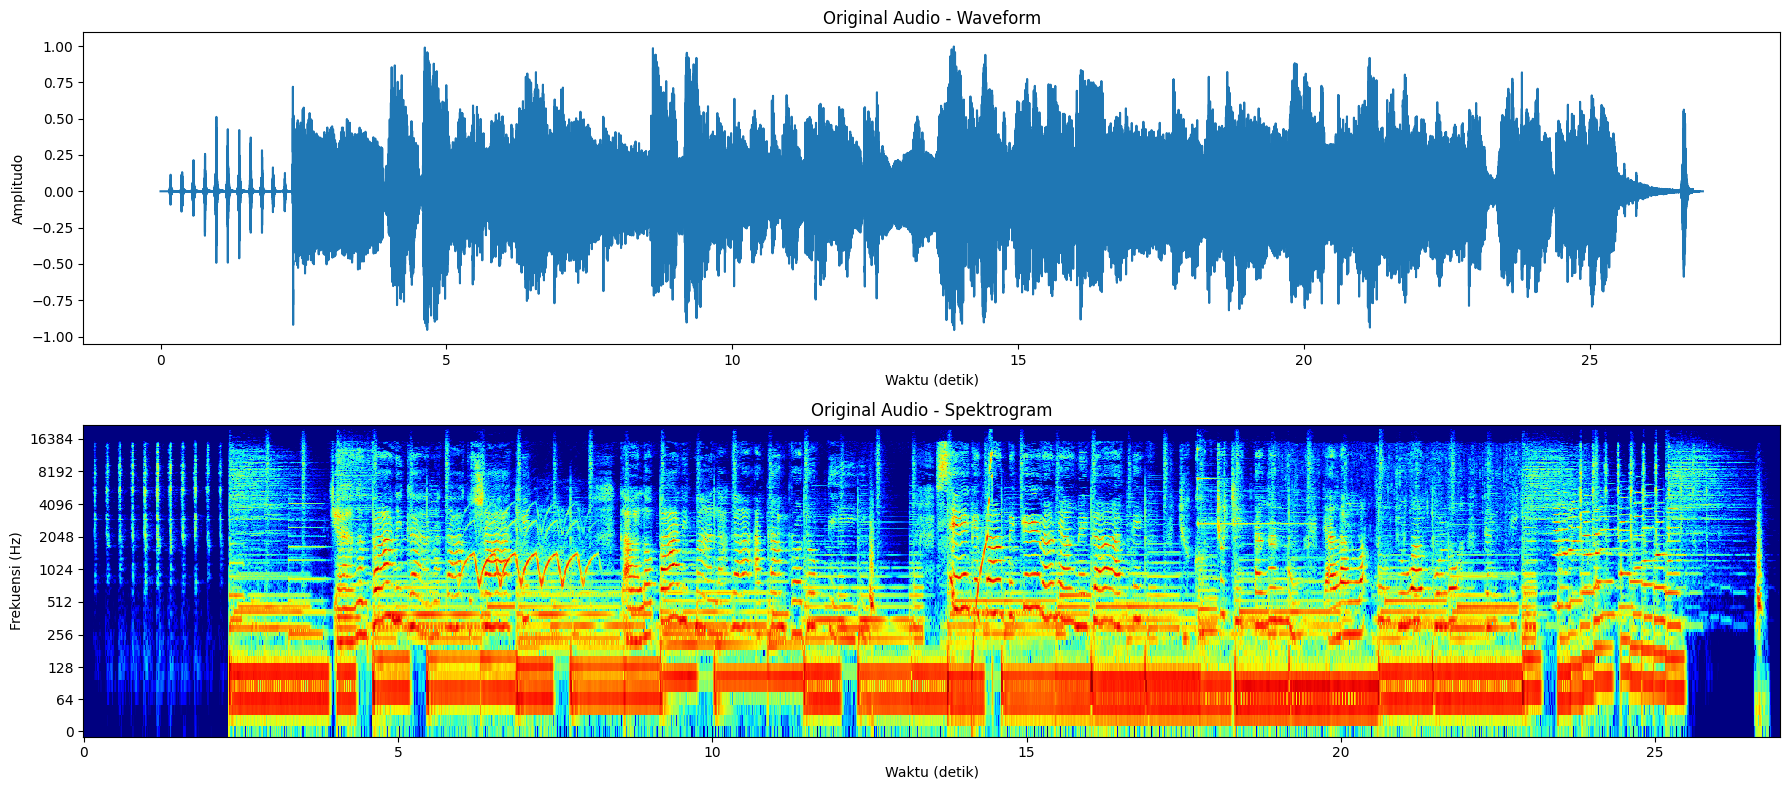

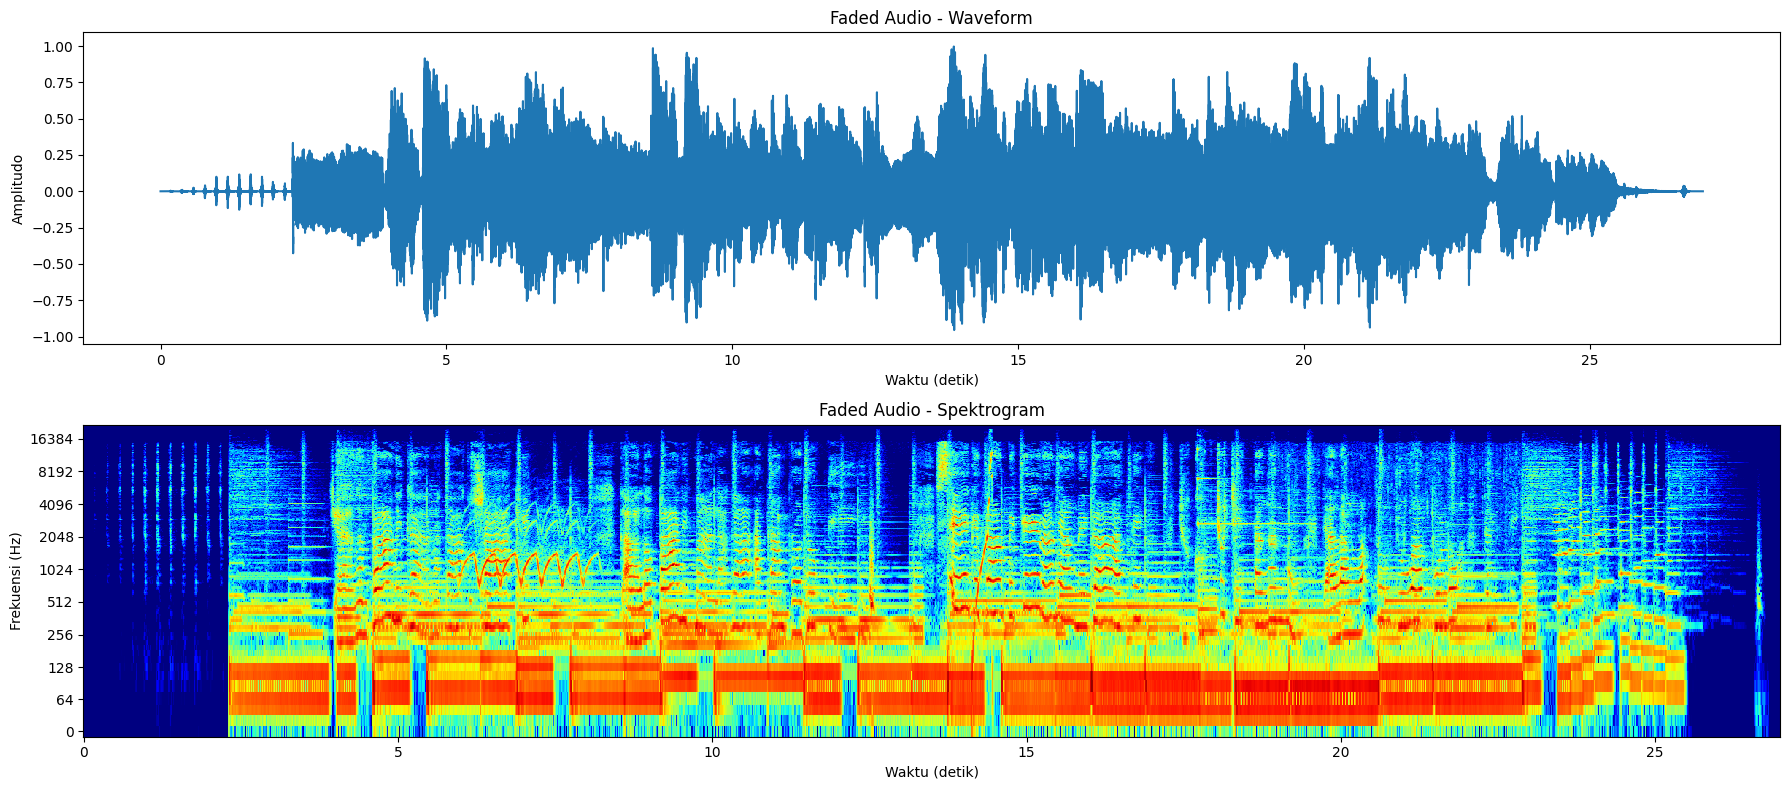

Audio dengan efek fading telah disimpan di: E:\2025 project\multimedia\faded_music.wav


In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

# Fungsi untuk memuat audio menggunakan librosa (untuk visualisasi)
def load_audio_with_librosa(file_path):
    audio_data, sr = librosa.load(file_path, sr=None)
    return audio_data, sr

# Fungsi untuk visualisasi waveform dan spektrogram
def visualize_audio(audio_data, sr, title='Audio'):
    time_axis = np.linspace(0, len(audio_data) / sr, len(audio_data))
    
    # Membuat figure dengan dua sub-plot (waveform dan spektrogram)
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    # Plot waveform
    ax[0].plot(time_axis, audio_data)
    ax[0].set_title(f'{title} - Waveform')
    ax[0].set_xlabel('Waktu (detik)')
    ax[0].set_ylabel('Amplitudo')
    
    # Plot spektrogram
    S = librosa.stft(audio_data)
    S_db = librosa.amplitude_to_db(np.abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet', ax=ax[1])
    ax[1].set_title(f'{title} - Spektrogram')
    ax[1].set_xlabel('Waktu (detik)')
    ax[1].set_ylabel('Frekuensi (Hz)')
    
    plt.tight_layout()
    plt.show()

# Path ke file audio Anda
file_path = r"E:\2025 project\multimedia\soal2.wav"  # Ganti dengan path file musik Anda

# Memuat audio menggunakan pydub
audio_data_pydub = AudioSegment.from_file(file_path)

# Pastikan durasi audio kurang dari 30 detik
if len(audio_data_pydub) / 1000 > 30:
    print("Durasi audio lebih dari 30 detik. Silakan pilih file audio yang durasinya kurang dari 30 detik.")
else:
    # Durasi fade-in dan fade-out dalam milidetik (5 detik)
    fade_in_duration_ms = 5000  # Durasi fade-in 5 detik
    fade_out_duration_ms = 5000  # Durasi fade-out 5 detik

    # Menerapkan efek fading pada audio
    faded_audio_pydub = audio_data_pydub.fade_in(fade_in_duration_ms).fade_out(fade_out_duration_ms)

    # Menyimpan audio yang telah diterapkan fading
    output_path = r"E:\2025 project\multimedia\faded_music.wav"  
    faded_audio_pydub.export(output_path, format="wav")

    # Memuat kembali audio yang telah diterapkan fading untuk visualisasi
    faded_audio_librosa, sr = load_audio_with_librosa(output_path)

    # Visualisasi audio sebelum dan sesudah fading
    original_audio_librosa, _ = load_audio_with_librosa(file_path)
    visualize_audio(original_audio_librosa, sr, 'Original Audio')
    visualize_audio(faded_audio_librosa, sr, 'Faded Audio')

    print("Audio dengan efek fading telah disimpan di:", output_path)


#### penjelasan 
- Fading dihasilkan dengan penurunan atau peningkatan volume yang halus, yang tercermin baik dalam waveform (pengurangan amplitudo) maupun di spectrogram (penurunan intensitas frekuensi). Teknik ini sering digunakan untuk transisi suara yang lebih alami. 
- file suara : https://drive.google.com/file/d/13e1b5GZYexXttKhqEHwggrF4-1mbQC89/view?usp=drive_link

# Soal 3
Rekam suara Anda berbicara di sekitar objek yang berisik (seperti kipas angin, AC, atau mesin).
Rekaman tersebut harus berdurasi kurang lebih 10 detik.
Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
Gunakan filter equalisasi (high-pass, low-pass, dan band-pass) untuk menghilangkan noise pada rekaman tersebut.
Lakukan eksperimen dengan berbagai nilai frekuensi cutoff:
Visualisasikan hasil dari tiap filter dan bandingkan spektrogramnya.
Jelaskan:
Jenis noise yang muncul pada rekaman Anda
Filter mana yang paling efektif untuk mengurangi noise tersebut
Nilai cutoff yang memberikan hasil terbaik
Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering

## High Pass Filter

Sampling Rate: 44100


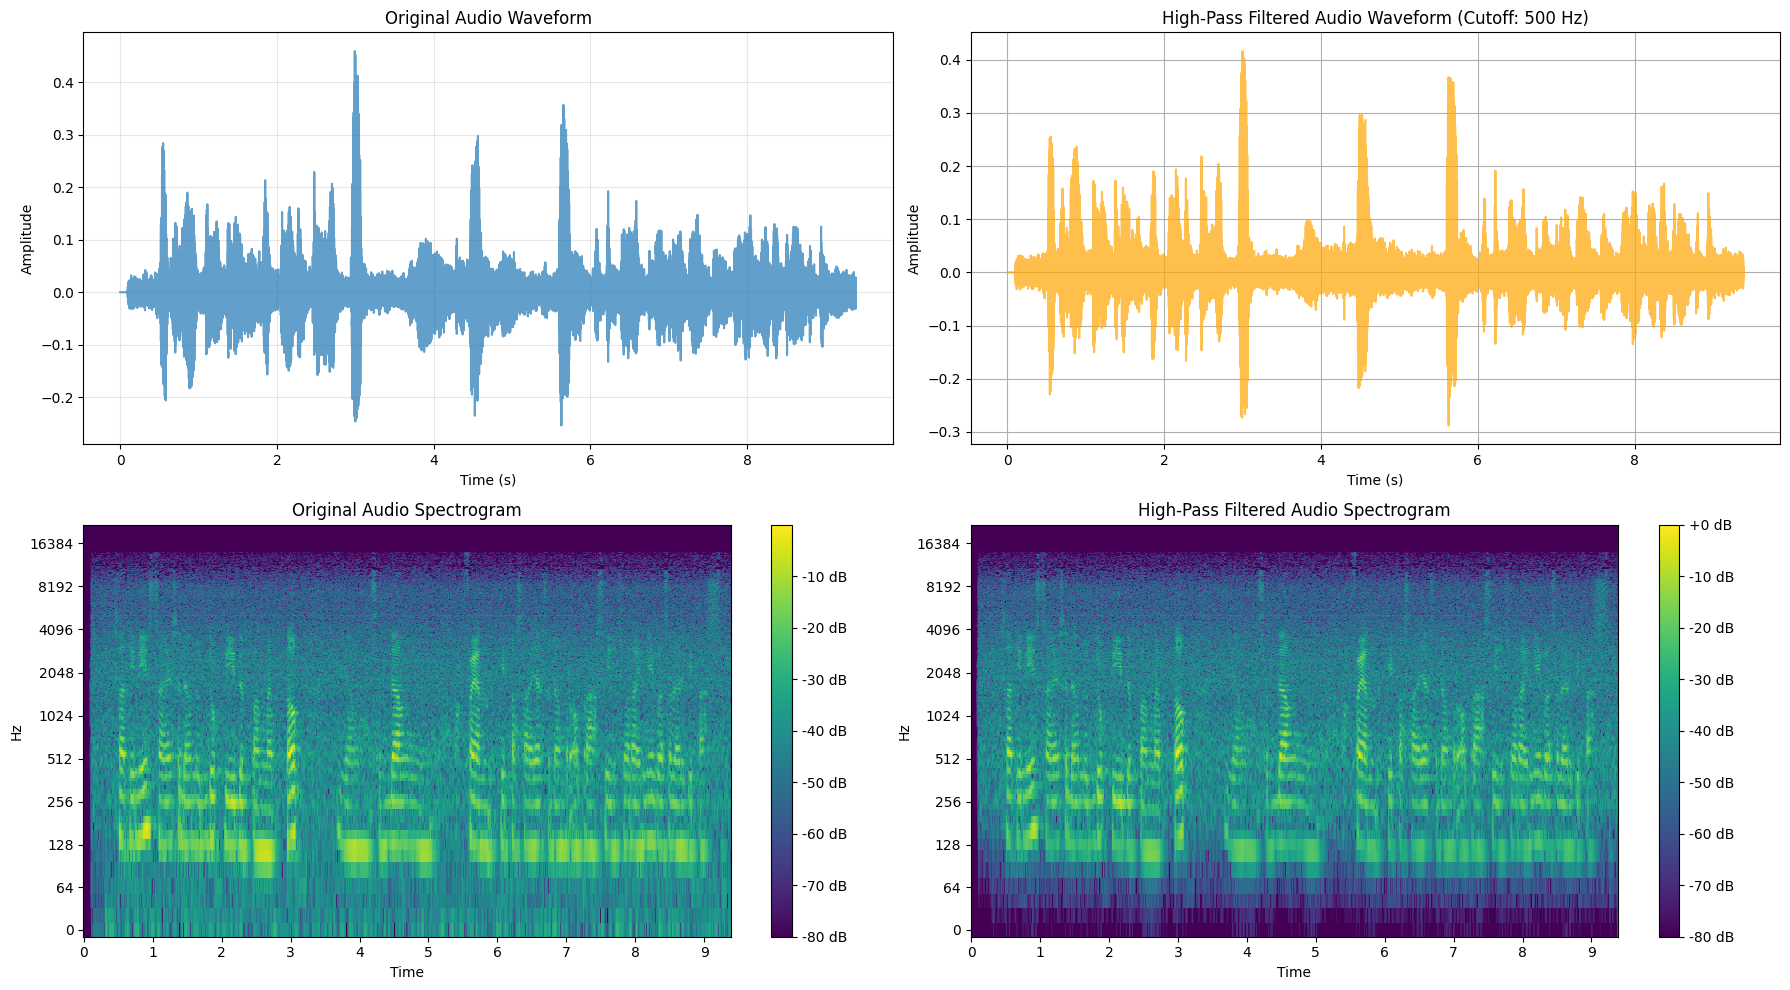

Filtered audio saved to output\high_pass_filtered.wav


In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal
import soundfile as sf

file_loc = os.path.join(os.getcwd(), r'soal3.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

# Fungsi untuk menerapkan high-pass filter
def high_pass_filter(audio_data, sr, cutoff=1000):    
    # mendesain filter
    b, a = signal.butter(2, cutoff, btype='high', fs=sr, output='ba')
    # menerapkan filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply high pass filter to the audio
hpassed_audio = high_pass_filter(y, sr, cutoff=200)

# Visualize the original and high-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, hpassed_audio, label='High-Pass Filtered', color='orange', alpha=0.7)
plt.title('High-Pass Filtered Audio Waveform (Cutoff: 500 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=1)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the high-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(hpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('High-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

# Ensure the 'output' folder exists
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the filtered audio
output_path = os.path.join(output_folder, 'high_pass_filtered.wav')
sf.write(output_path, hpassed_audio, sr)

print(f"Filtered audio saved to {output_path}")


### Output : 
https://drive.google.com/file/d/1KAOIUGnqtBSVjE7bvZu8Yp6ZBZAT70Rs/view?usp=drive_link 

## Low-Pass Filter

Sampling Rate: 44100


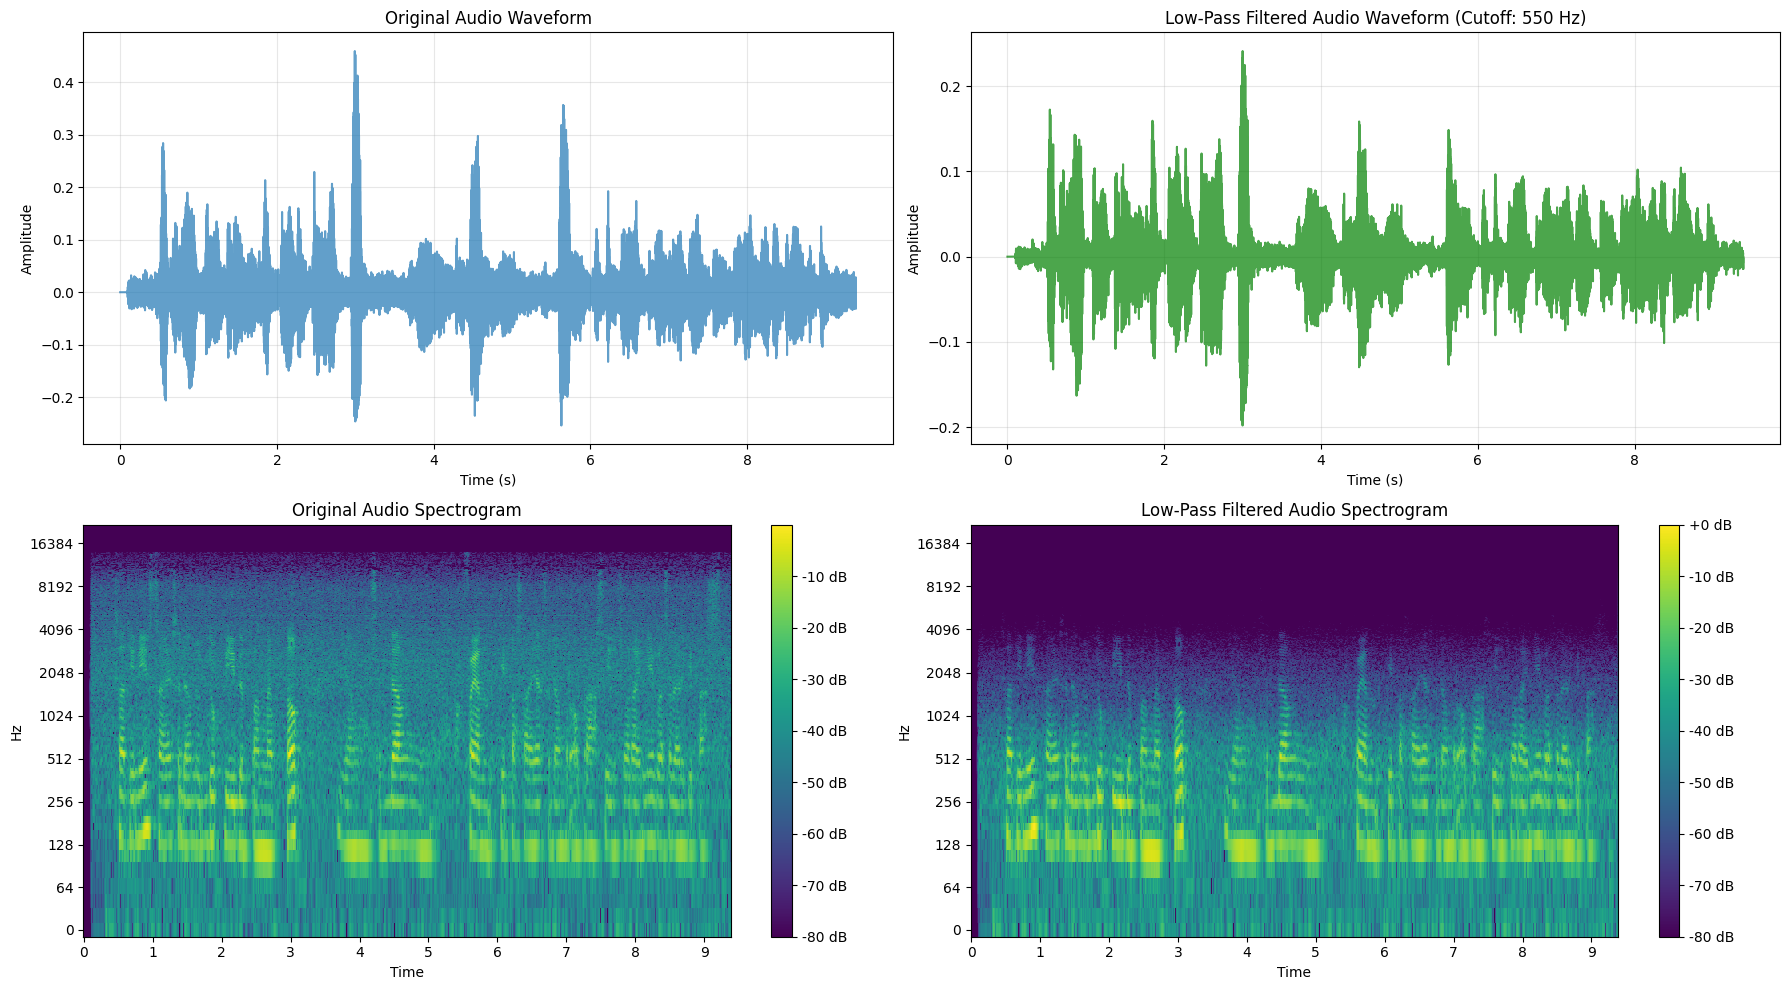

Low-pass filtered audio saved to output\low_pass_filtered.wav


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal
import soundfile as sf

file_loc = os.path.join(os.getcwd(), r'soal3.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

# Fungsi untuk menerapkan low-pass filter
def low_pass_filter(audio_data, sr, cutoff=1000):    
    # mendesain filter
    b, a = signal.butter(2, cutoff, btype='low', fs=sr, output='ba')
    # menerapkan filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply low pass filter to the audio
lpassed_audio = low_pass_filter(y, sr, cutoff=550)

# Visualize the original and low-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, lpassed_audio, label='Low-Pass Filtered', color='green', alpha=0.7)
plt.title('Low-Pass Filtered Audio Waveform (Cutoff: 550 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the low-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(lpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Low-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

# Ensure the 'output' folder exists
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the low-pass filtered audio
output_path = os.path.join(output_folder, 'low_pass_filtered.wav')
sf.write(output_path, lpassed_audio, sr)

print(f"Low-pass filtered audio saved to {output_path}")


### Output : 
https://drive.google.com/file/d/1U8ycHKoIhTYAC4T0vt6nETDFxRdb7fGS/view?usp=drive_link 

## Band-Pass Filter

Sampling Rate: 44100


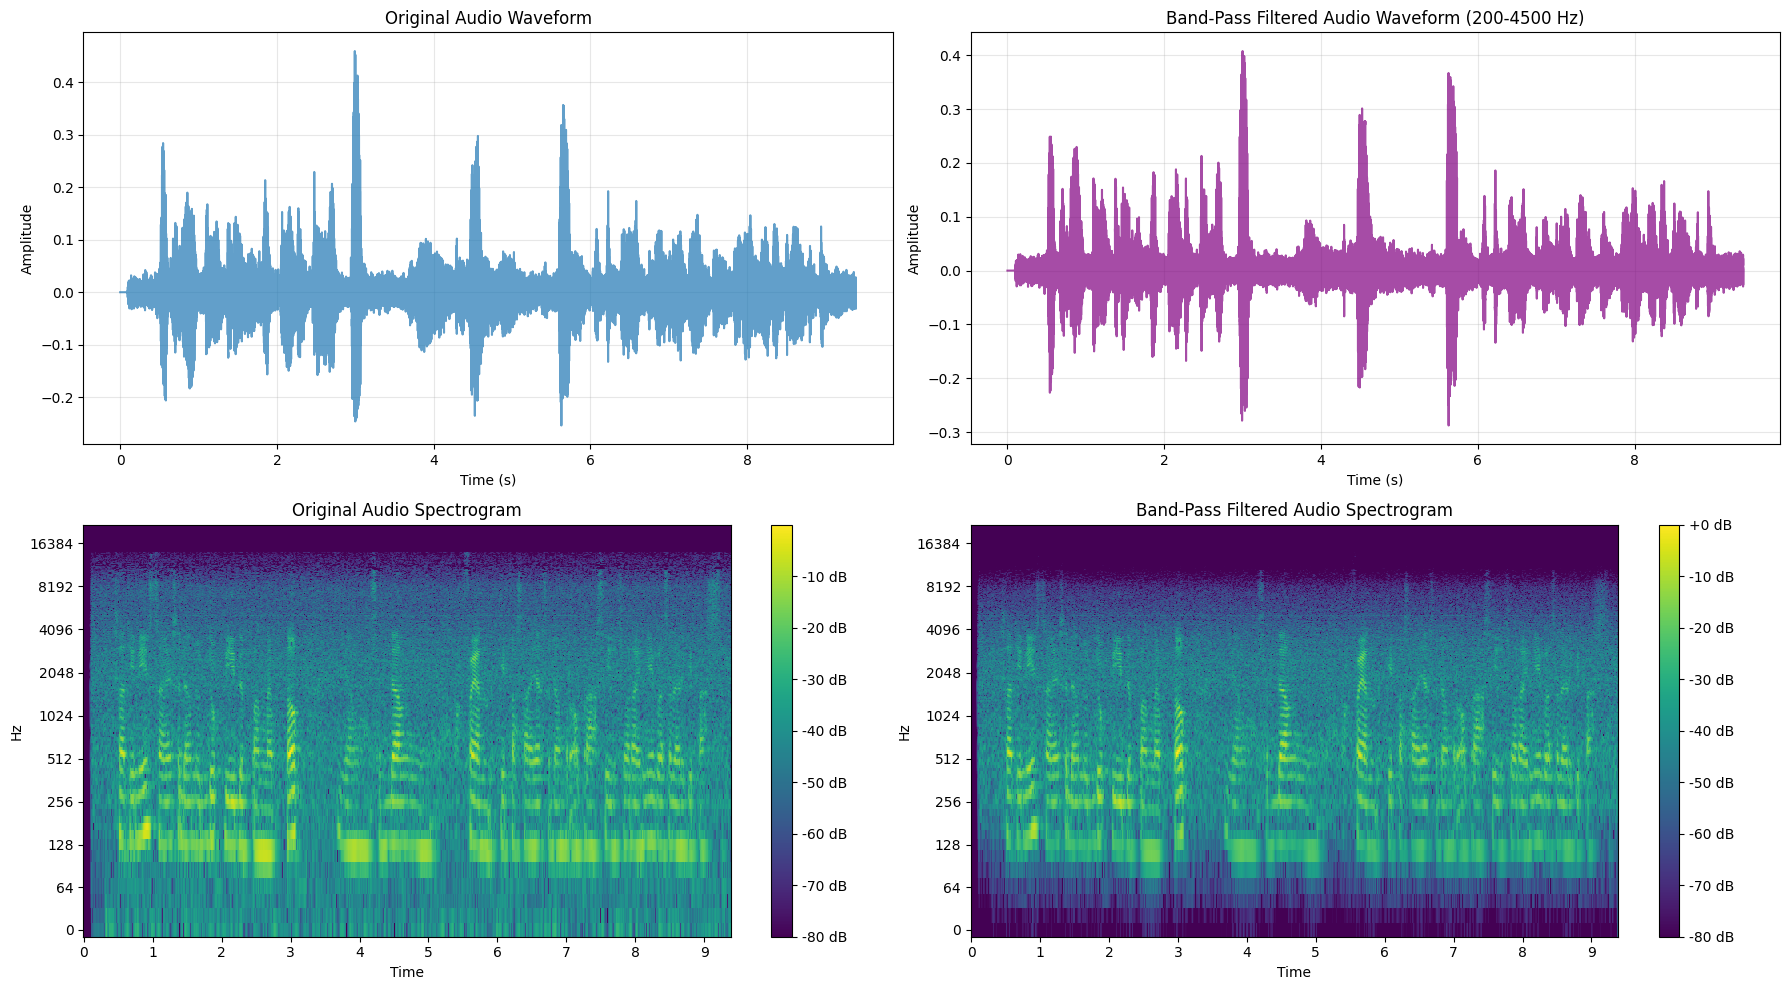

Band-pass filtered audio saved to output\band_pass_filtered.wav


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal
import soundfile as sf

file_loc = os.path.join(os.getcwd(), r'soal3.wav')
# Load audio with the original sampling rate
y, sr = librosa.load(file_loc, sr=None)
print(f"Sampling Rate: {sr}")

# Fungsi untuk menerapkan band-pass filter
def band_pass_filter(audio_data, sr, lowcut=500, highcut=2000):    
    # mendesain filter
    b, a = signal.butter(2, [lowcut, highcut], btype='band', fs=sr, output='ba')
    # menerapkan filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

# Apply band-pass filter to the audio
bpassed_audio = band_pass_filter(y, sr, lowcut=200, highcut=4500)

# Visualize the original and band-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, bpassed_audio, label='Band-Pass Filtered', color='purple', alpha=0.7)
plt.title('Band-Pass Filtered Audio Waveform (200-4500 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the band-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(bpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

# Ensure the 'output' folder exists
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the band-pass filtered audio
output_path = os.path.join(output_folder, 'band_pass_filtered.wav')
sf.write(output_path, bpassed_audio, sr)

print(f"Band-pass filtered audio saved to {output_path}")


### Output : 
https://drive.google.com/file/d/1yAZ_g2OCuyF50bQU-6q7rrcvIXCYft7Y/view?usp=drive_link 

### Jenis Noise yang Muncul pada Rekaman
- Noise pada Rekaman Asli: Dalam rekaman asli, kita dapat melihat adanya berbagai komponen suara yang tumpang tindih pada frekuensi rendah, serta beberapa komponen dengan frekuensi tinggi yang menghasilkan kebisingan atau distorsi.
- Noise yang Dihilangkan oleh Filter: Filter high-pass menghilangkan sebagian besar komponen frekuensi rendah yang tidak diinginkan (seperti bunyi hum atau background noise rendah). Filter low-pass mengurangi komponen frekuensi tinggi yang tidak relevan atau noise tajam yang dapat mengganggu suara ucapan.

### Filter yang Paling Efektif untuk Mengurangi Noise
- High-Pass Filter: Efektif menghilangkan noise pada frekuensi rendah (seperti suara mesin laptop atau kipas angin). Dalam visualisasi, kita bisa melihat bahwa filter ini sangat efektif dalam mengurangi suara latar belakang dengan frekuensi rendah.
- Low-Pass Filter: Efektif mengurangi suara frekuensi tinggi yang tajam atau berisik, namun jika digunakan pada cutoff yang terlalu tinggi, bisa menyebabkan hilangnya beberapa detail suara.
- Band-Pass Filter: Filter ini efektif dalam menargetkan rentang frekuensi tertentu dan sangat berguna untuk memperbaiki kualitas suara dengan menonjolkan frekuensi yang relevan untuk ucapan manusia, serta mengurangi noise di luar rentang tersebut.

### Nilai Cutoff yang Memberikan Hasil Terbaik
- High-Pass Filter: Dengan cutoff 500 Hz, kita dapat menghilangkan sebagian besar frekuensi rendah yang tidak relevan tanpa mengorbankan kualitas suara ucapan. Cutoff yang lebih rendah akan mengurangi terlalu banyak informasi penting.
- Low-Pass Filter: Cutoff 3000 Hz untuk low-pass filter memberikan hasil yang baik karena dapat mengurangi noise frekuensi tinggi tanpa menghilangkan banyak informasi penting dari ucapan.
- Band-Pass Filter: Rentang frekuensi 200 Hz - 4500 Hz memberikan hasil terbaik untuk suara ucapan karena mencakup sebagian besar frekuensi yang digunakan dalam percakapan manusia, sambil mengurangi noise di luar rentang tersebut.

### Kualitas Suara (Kejelasan Ucapan) Setelah Proses Filtering
- High-Pass Filter: Setelah menggunakan filter ini, suara ucapan menjadi lebih jelas, terutama di lingkungan yang bising dengan banyak suara frekuensi rendah. Filter ini mengurangi suara latar yang tidak diinginkan.
- Low-Pass Filter: Setelah filter low-pass diterapkan, kualitas suara terdengar lebih halus, namun dapat kehilangan beberapa detail frekuensi tinggi, terutama jika suara tersebut memiliki komponen tinggi yang penting.
- Band-Pass Filter: Menggunakan filter band-pass memberikan hasil terbaik dalam meningkatkan kualitas ucapan karena hanya mempertahankan frekuensi yang relevan untuk suara manusia, sambil mengurangi noise frekuensi rendah dan tinggi.

## Jenis Noise yang Muncul pada Rekaman
- Noise Frekuensi Rendah: Pada rekaman asli, terlihat adanya suara frekuensi rendah yang dominan berupa suara mekanikal dari mesin atau suara latar lain yang tidak diinginkan (seperti bunyi hum dari peralatan elektronik).

- Noise Frekuensi Tinggi: Ada beberapa gangguan frekuensi tinggi, seperti suara desis atau noise bising yang muncul terutama di akhir rekaman.

# Soal 4
Lakukan pitch shifting pada rekaman suara Soal 1 untuk membuat suara terdengar seperti chipmunk (dengan mengubah pitch ke atas).
Visualisasikan waveform dan spektrogram sebelum dan sesudah pitch shifting.
Jelaskan proses pitch shifting yang Anda lakukan, termasuk:
Parameter yang digunakan
Perbedaan dalam representasi visual antara suara asli dan suara yang telah dimodifikasi
Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara
Gunakan dua buat pitch tinggi, misalnya pitch +7 dan pitch +12.
Gabungkan kedua rekaman yang telah di-pitch shift ke dalam satu file audio. (Gunakan ChatGPT / AI untuk membantu Anda dalam proses ini)

Sampling Rate: 44100


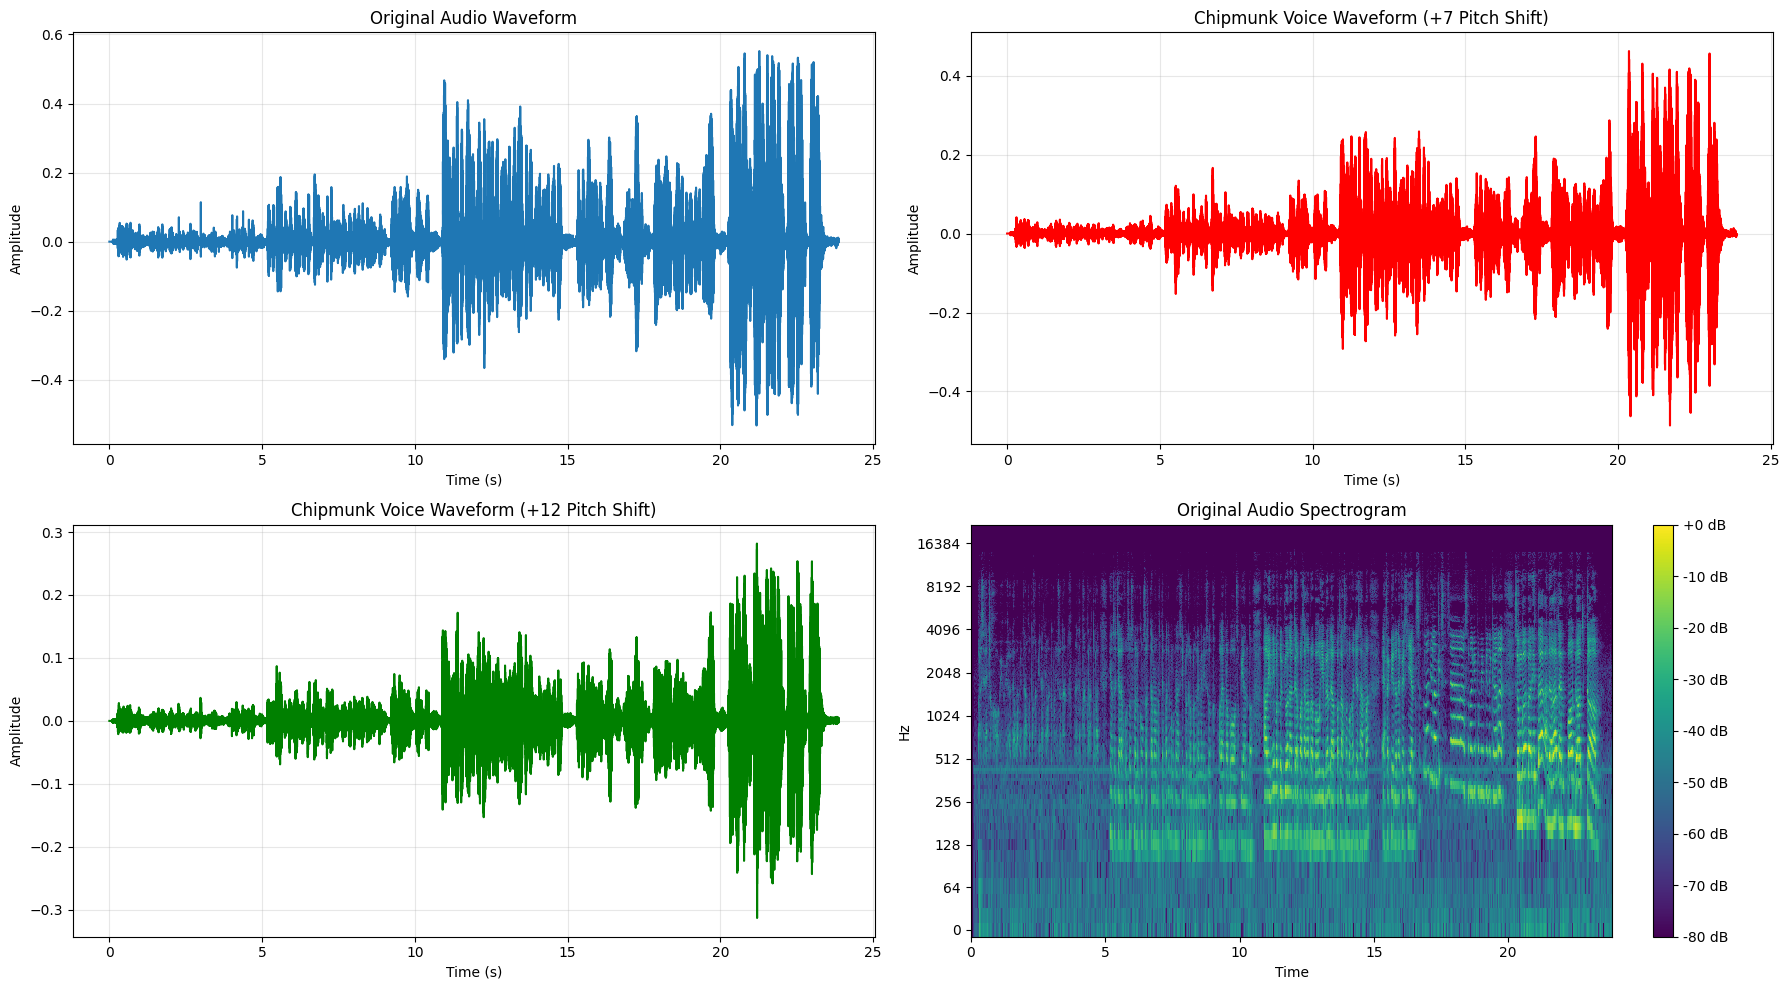

Combined chipmunk voice saved to output\combined_chipmunk_voice.wav


In [5]:
# import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Path to the uploaded file
file_path = r"E:\2025 project\multimedia\soal1.wav.wav"
# Load the audio file
y, sr = librosa.load(file_path, sr=None)
print(f"Sampling Rate: {sr}")

# Fungsi untuk membuat efek suara chipmunk (pitch shifting)
def create_chipmunk_voice(audio_data, sr, pitch_steps=7):
    # Using librosa's pitch_shift function
    chipmunk_audio = librosa.effects.pitch_shift(audio_data, sr=sr, n_steps=pitch_steps, bins_per_octave=12)
    return chipmunk_audio

# Apply chipmunk effect (higher pitch)
chipmunk_voice_7 = create_chipmunk_voice(y, sr, pitch_steps=7)  # +7 pitch
chipmunk_voice_12 = create_chipmunk_voice(y, sr, pitch_steps=12)  # +12 pitch

# Visualize the original and pitch-shifted audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot waveforms
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis[:len(chipmunk_voice_7)], chipmunk_voice_7, label='Chipmunk Voice (+7)', color='red')
plt.title('Chipmunk Voice Waveform (+7 Pitch Shift)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(time_axis[:len(chipmunk_voice_12)], chipmunk_voice_12, label='Chipmunk Voice (+12)', color='green')
plt.title('Chipmunk Voice Waveform (+12 Pitch Shift)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 4)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

plt.tight_layout()
plt.show()

# Combine both pitch-shifted voices into one audio file
combined_audio = np.concatenate([chipmunk_voice_7, chipmunk_voice_12])

# Save the combined audio to a new file
output_path = os.path.join('output', 'combined_chipmunk_voice.wav')

# Ensure the 'output' folder exists
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

sf.write(output_path, combined_audio, sr)

print(f"Combined chipmunk voice saved to {output_path}")


### Hasil : 
- normal :https://drive.google.com/file/d/1NTVxpevLyLCV9XXauv1wOWXg_36ov68m/view?usp=drive_link
- gabung : https://drive.google.com/file/d/1xTHFC0yxGFeNyEe61I9g5VTVwGrXfXxI/view?usp=drive_link 

# Soal 5
Lakukan normalisasi dan loudness optimization pada rekaman yang sudah di-pitch shift pada Soal 4.
Atur nilai target loudness ke -18 LUFS (Loudness Unit Full Scale).
Visualisasikan waveform dan spektrogram sebelum dan sesudah proses normalisasi.
Jelaskan:
Perubahan dinamika suara yang terjadi
Perbedaan antara normalisasi peak dan normalisasi LUFS
Bagaimana kualitas suara berubah setelah proses normalisasi dan loudness optimization
Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suara

Sampling Rate: 44100
Current Loudness: -26.35 LUFS
Gain to Apply: 8.35 dB


c:\Users\a c e r\AppData\Local\Programs\Python\Python310\lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


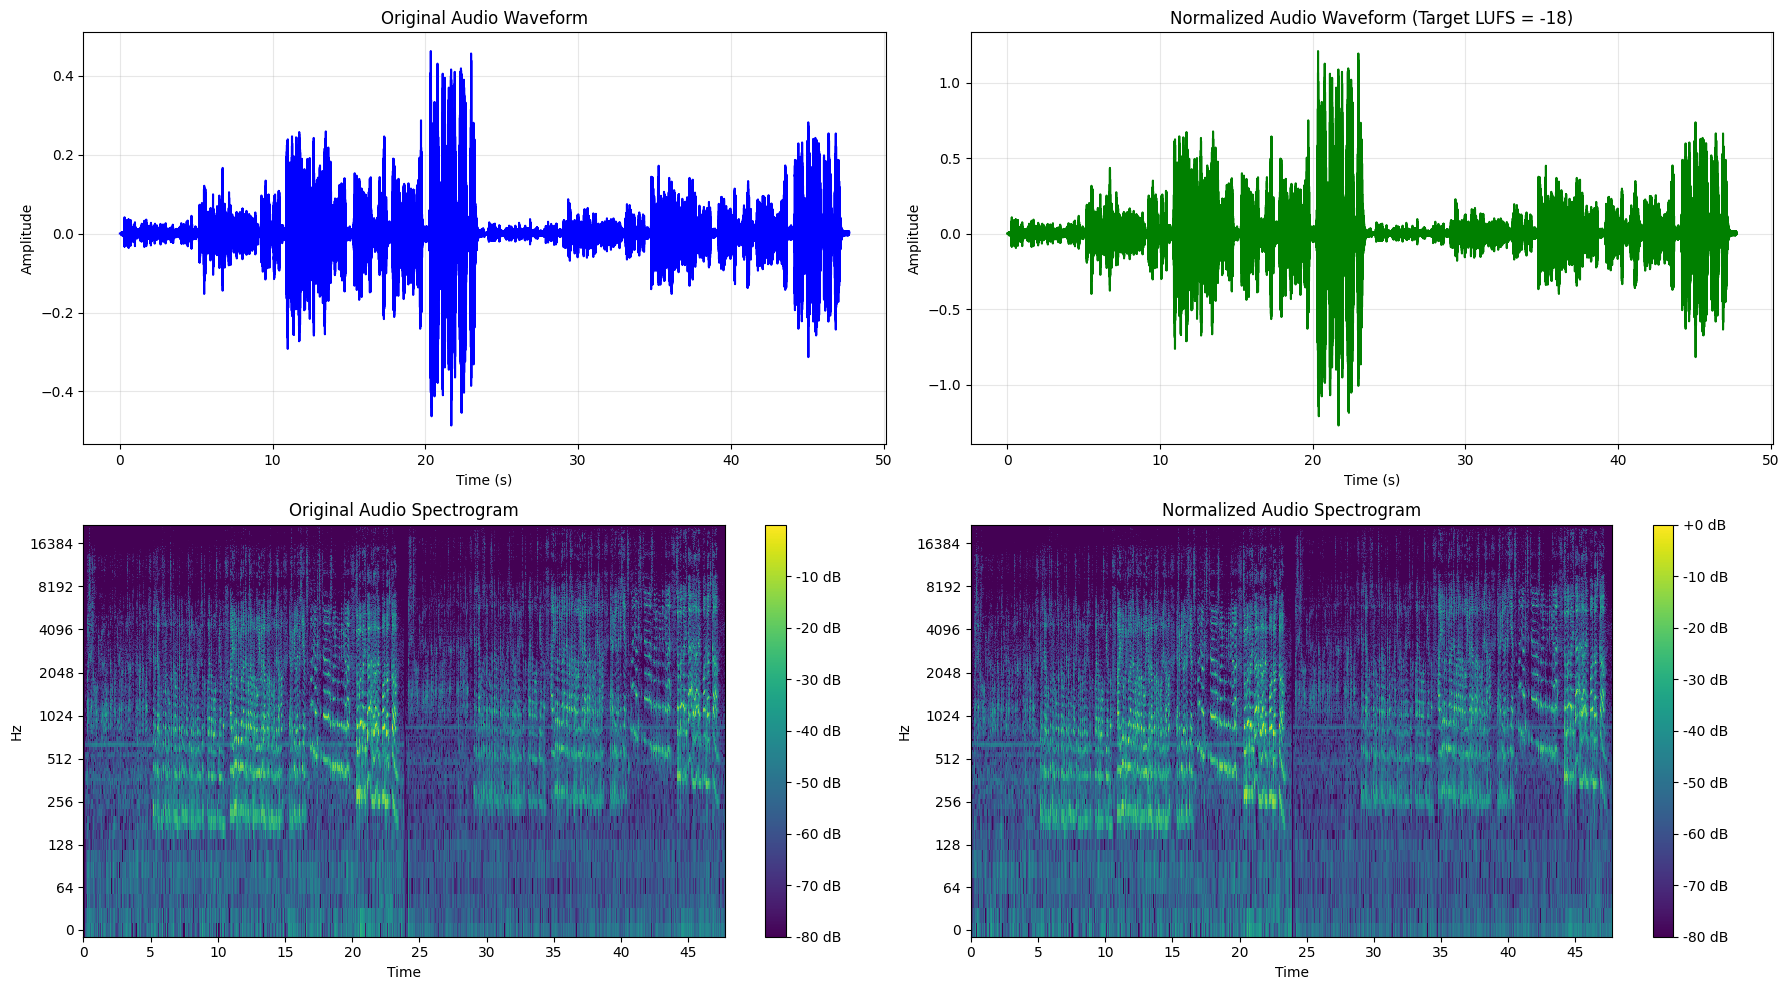

Normalized audio saved to output\normalized_chipmunk_voice.wav
Original Audio LUFS: -26.35
Normalized Audio LUFS: -18.00


In [8]:
import os
import librosa
import numpy as np
import soundfile as sf
import pyloudnorm as pyln
import matplotlib.pyplot as plt

# Path to the uploaded file
file_path = "E:/2025 project/multimedia/output/combined_chipmunk_voice.wav"

# Load the audio file
y, sr = librosa.load(file_path, sr=None)
print(f"Sampling Rate: {sr}")

# Fungsi untuk normalisasi audio berdasarkan target LUFS
def normalize_audio_lufs(audio_data, sr, target_lufs=-18.0):
    # Create loudness meter
    meter = pyln.Meter(sr)
    
    # Measure the current loudness of the audio
    current_loudness = meter.integrated_loudness(audio_data)
    print(f"Current Loudness: {current_loudness:.2f} LUFS")
    
    # Calculate gain needed to reach target loudness
    gain = target_lufs - current_loudness
    print(f"Gain to Apply: {gain:.2f} dB")
    
    # Apply the gain to the audio
    normalized_audio = pyln.normalize.loudness(audio_data, current_loudness, target_lufs)
    
    return normalized_audio

# Apply LUFS normalization
normalized_audio = normalize_audio_lufs(y, sr, target_lufs=-18.0)

# Visualize the original and normalized audio
plt.figure(figsize=(18, 10))

# Time axis for visualization
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot original audio waveform
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, color='blue')
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Plot normalized audio waveform
plt.subplot(2, 2, 2)
plt.plot(time_axis[:len(normalized_audio)], normalized_audio, color='green')
plt.title('Normalized Audio Waveform (Target LUFS = -18)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Original audio spectrogram
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Normalized audio spectrogram
plt.subplot(2, 2, 4)
D_normalized = librosa.amplitude_to_db(np.abs(librosa.stft(normalized_audio)), ref=np.max)
librosa.display.specshow(D_normalized, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Normalized Audio Spectrogram')

plt.tight_layout()
plt.show()

# Save the normalized audio
output_path = os.path.join('output', 'normalized_chipmunk_voice.wav')

# Ensure the 'output' folder exists
output_folder = 'output'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

sf.write(output_path, normalized_audio, sr)

print(f"Normalized audio saved to {output_path}")

# Estimate LUFS before and after normalizing
meter = pyln.Meter(sr)
original_loudness = meter.integrated_loudness(y)
normalized_loudness = meter.integrated_loudness(normalized_audio)

print(f"Original Audio LUFS: {original_loudness:.2f}")
print(f"Normalized Audio LUFS: {normalized_loudness:.2f}")


## Perubahan Dinamika Suara yang Terjadi:
- Audio Asli: Pada grafik waveform dan spectrogram audio asli, terlihat bahwa ada bagian yang memiliki volume sangat tinggi (peak) dan bagian lain yang sangat lemah. Hal ini menunjukkan adanya perbedaan besar dalam intensitas suara, yang menciptakan rentang dinamis yang sangat lebar.
- Audio Setelah Normalisasi: Setelah proses loudness normalization diterapkan dengan target -18 LUFS, suara menjadi lebih konsisten. Perbedaan volume antara bagian suara keras dan lembut menjadi lebih seimbang. Secara umum, suara menjadi lebih rata dan stabil.
- Pengurangan Dinamika: Proses normalisasi ini mengurangi perbedaan besar antara bagian yang paling keras dan yang paling lembut, yang artinya rentang dinamisnya lebih sempit. Hal ini menjadikan suara terdengar lebih rata, meski sedikit mengurangi variasi volume alami.

## Perbedaan antara Normalisasi Peak dan Normalisasi LUFS:
- Normalisasi Peak: Normalisasi ini hanya memperhatikan puncak tertinggi dari suara. Artinya, ia hanya akan memastikan bahwa amplitudo puncak tidak melebihi nilai tertentu, seperti -0.1 dB. Teknik ini tidak mempertimbangkan bagaimana kita mendengar suara secara keseluruhan.
- Normalisasi LUFS: LUFS (Loudness Units Full Scale) adalah cara untuk mengukur loudness yang lebih sesuai dengan cara kita mendengar suara. Normalisasi LUFS mempertimbangkan seluruh aspek suara, termasuk frekuensi yang lebih rendah dan tinggi, sehingga audio lebih terasa konsisten di telinga pendengar. Dengan LUFS, kita bisa mengatur volume suara agar lebih stabil dan enak didengar sepanjang durasi rekaman.


## Bagaimana Kualitas Suara Berubah Setelah Proses Normalisasi dan Loudness Optimization:
- Kualitas Suara: Setelah normalisasi, kualitas suara tetap baik, tetapi dinamika suaranya menjadi lebih terkontrol. Artinya, suara tidak terlalu keras atau terlalu lembut di bagian-bagian tertentu, sehingga lebih nyaman didengarkan secara keseluruhan. Namun, ada beberapa bagian yang kehilangan karakteristik alami volume yang sebelumnya lebih kuat atau lebih lembut.

- Kejelasan: Suara yang lebih konsisten dalam hal volume membantu membuat rekaman lebih jelas dan mudah didengar, terutama dalam konteks siaran atau platform streaming. Namun, normalisasi yang berlebihan bisa mengurangi efek emosional yang biasanya dihasilkan dari variasi volume yang lebih dinamis.

## Kelebihan dan Kekurangan dari Pengoptimalan Loudness dalam Konteks Rekaman Suara:

  Kelebihan:
+ Konsistensi: Salah satu manfaat utama dari loudness optimization adalah konsistensi volume suara. Ini penting agar pendengar tidak terganggu oleh perubahan volume yang besar antara satu segmen dan segmen lainnya, misalnya dalam podcast atau radio.
+ Standarisasi: Banyak platform siaran atau streaming yang memiliki standar volume tertentu (misalnya, -18 LUFS). Dengan mengoptimalkan loudness sesuai standar ini, kita memastikan rekaman sesuai dengan aturan yang ada.
+ Kontrol Lebih Baik: Pengoptimalan ini memberi kontrol lebih besar atas bagaimana suara didengar, sehingga bagian yang terlalu lembut tetap terdengar cukup keras dan yang terlalu keras tidak mengganggu.

Kekurangan:
+ Kehilangan Dinamika: Salah satu kekurangan pengoptimalan loudness adalah berkurangnya variasi alami dalam suara. Misalnya, dalam musik atau film, perbedaan volume antara bagian yang lembut dan keras bisa sangat penting untuk efek dramatis, dan ini bisa hilang jika terlalu banyak dioptimalkan.
+ Potensi Distorsi: Jika terlalu banyak gain diterapkan, ada risiko distorsi pada audio. Hal ini terjadi ketika amplitudo suara dipaksa untuk tetap di bawah level tertentu, yang mengurangi kualitas suara yang lebih alami.





# Referensi  
- bukti percakapan dengan AI : https://chatgpt.com/share/67f4cfac-b720-8009-9498-fef495eadaad 
- data soal no 2 : Sarah Saputri - 20Detik Cuci Corona  https://youtu.be/XxfzLTyV1zU?si=q1b2iAiLoeB1ijl3 
- Hasil render : https://drive.google.com/drive/folders/1PXy4uQEuW-A8UjvdMkCK7nQvlhFafcQU?usp=sharing 